In [1]:
import pandas as pd
import numpy as np
import os
import copy
import matplotlib.pyplot as plt
import seaborn as sns


def heatmap_plot(contingency_table, x_label, y_label, im_path, val_pair):
    plt.figure(figsize=(10, 7))
    sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")    
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.text(0.5, 0.9, f"corr: {np.round(val_pair[0], 2)}, P-value: {np.round(val_pair[1], 3)}", 
             horizontalalignment='center', 
             verticalalignment='center',
             fontsize=15)
    
    if not im_path==None:
        plt.savefig(im_path, dpi=300)
        # plt.show()
    
def measure_resi(sharp_dic, df, resi_cols, measured, threshold=0.2):
    df2process = copy.deepcopy(df)
    remain_lst = [ col for col in resi_cols if col != measured ]    
    df2process['avg_others'] = df2process[remain_lst].mean(axis=1)
    
    df2process[measured + '_diff'] = df2process[measured] - df2process['avg_others']
#     df2process[measured + '_diff'] = np.abs(df2process[measured] - df2process['avg_others'])

    filtered_df = df2process[df2process[measured + '_diff'] > threshold]
    filtered_df = filtered_df.sort_values(measured + '_diff', ascending=False)
    
    sharp_dic.update( {(measured + '_diff'):list(filtered_df['city'].values)} )
    return sharp_dic, filtered_df
                        

def sorting_res(df, col_name, remain=12, abs_=True):
    df2process = copy.deepcopy(df)
    
    if abs_:
        df2process['abs'+col_name] = np.abs(df2process[col_name])
        df_sort = df2process.sort_values(by='abs'+col_name, ascending=False)
    else:
        df_sort = df2process.sort_values(by=col_name, ascending=False)
    
    head_df = df_sort.head(remain)
    tail_df = df_sort.tail(remain)
    
    print(head_df)
    print()
    print(tail_df)
    
    return df_sort, list(head_df['city']), list(tail_df['city'])



### supplementary table formatting - 1 spearman analysis transfer

In [ ]:
root_ = os.path.join(os.getcwd(), 'Syn-DiD Model\\results')
corr_df = pd.read_csv(os.path.join(root_, 'industry_spearman_full.csv'))
corr_df


In [ ]:
corr_df['combined'] = corr_df['corr'].apply(lambda x: "{:.3f}".format(x)) + " (" + corr_df['sig'].apply(lambda x: "{:.2e}".format(x)) + ")"

# Pivot the dataframe
df_pivot = corr_df.pivot(index='x', columns='y', values='combined')

df_pivot.head()
df_pivot.to_csv(os.path.join(os.getcwd(), 'industry_spearman_full.csv'))


### ATT analysis

In [2]:
results_path = 'D:\\OneDrive\\Code Warehouse\\Syn-DiD Model\\results\\industry_resilience.csv'

df_res = pd.read_csv(results_path)
att_abs_cols = ['att', 'att_in', 'att_pos']
resi_cols = ['resi_all_abs', 'resi_in_abs', 'resi_after_abs', 'extreme']
add_cols = ['city', 'type']


In [3]:
att_abs = pd.concat([df_res[add_cols], df_res[att_abs_cols]*10000], axis=1)
att_df_sort, att_heads, att_tails = sorting_res(att_abs, 'att', 20)


           city  type      att   att_in  att_pos   absatt
66   Zhejiang 1     3 -28320.0 -25970.0 -32720.0  28320.0
44     Shandong     4  27640.0  15740.0  51280.0  27640.0
56    Tianjin 1     4  24500.0  19850.0  34360.0  24500.0
14      Gansu 1     3 -22450.0 -17840.0 -32270.0  22450.0
7     Chongqing     1 -18400.0 -25610.0  -3510.0  18400.0
45     Shanghai     1 -16020.0 -20490.0  -6980.0  16020.0
8   Chongqing 1     1  15610.0  15970.0  16020.0  15610.0
26        Hebei     2  14760.0   5450.0  33700.0  14760.0
33        Hunan     3 -14260.0 -13590.0 -15580.0  14260.0
20      Guizhou     4  11470.0   8590.0  22000.0  11470.0
36        Jilin     1 -10380.0 -16370.0   1190.0  10380.0
13        Gansu     3 -10360.0  -7290.0 -16870.0  10360.0
0         Anhui     2  10290.0   4020.0  23050.0  10290.0
30        Henan     2   9500.0   4560.0  19820.0   9500.0
46   Shanghai 1     3  -8880.0  -5460.0 -15820.0   8880.0
38        Jinan     4   8100.0   5170.0  13640.0   8100.0
42      Qingha

In [4]:
temp = list(np.unique([city.split(' ')[0] for city in list(att_df_sort[att_df_sort['absatt']>10000]['city'].values)]))
len(temp)

11

In [5]:
attin_df_sort, attin_heads, attin_tails = sorting_res(att_abs, 'att_in', 12)


           city  type      att   att_in  att_pos  absatt_in
66   Zhejiang 1     3 -28320.0 -25970.0 -32720.0    25970.0
7     Chongqing     1 -18400.0 -25610.0  -3510.0    25610.0
45     Shanghai     1 -16020.0 -20490.0  -6980.0    20490.0
56    Tianjin 1     4  24500.0  19850.0  34360.0    19850.0
59        Wuhan     1  -3680.0 -18240.0  25900.0    18240.0
14      Gansu 1     3 -22450.0 -17840.0 -32270.0    17840.0
36        Jilin     1 -10380.0 -16370.0   1190.0    16370.0
8   Chongqing 1     1  15610.0  15970.0  16020.0    15970.0
44     Shandong     4  27640.0  15740.0  51280.0    15740.0
33        Hunan     3 -14260.0 -13590.0 -15580.0    13590.0
20      Guizhou     4  11470.0   8590.0  22000.0     8590.0
53       Suzhou     1  -2930.0  -8480.0   8130.0     8480.0

            city  type     att  att_in  att_pos  absatt_in
35       Jiangsu     2  3060.0  -590.0  10060.0      590.0
25    Hangzhou 1     4   690.0   360.0   1380.0      360.0
62          Xian     3  -340.0  -330.0   -

In [6]:
attpo_df_sort, attpo_heads, attpo_tails = sorting_res(att_abs, 'att_pos', 25)


            city  type      att   att_in  att_pos  absatt_pos
44      Shandong     4  27640.0  15740.0  51280.0     51280.0
56     Tianjin 1     4  24500.0  19850.0  34360.0     34360.0
26         Hebei     2  14760.0   5450.0  33700.0     33700.0
66    Zhejiang 1     3 -28320.0 -25970.0 -32720.0     32720.0
14       Gansu 1     3 -22450.0 -17840.0 -32270.0     32270.0
59         Wuhan     1  -3680.0 -18240.0  25900.0     25900.0
0          Anhui     2  10290.0   4020.0  23050.0     23050.0
20       Guizhou     4  11470.0   8590.0  22000.0     22000.0
30         Henan     2   9500.0   4560.0  19820.0     19820.0
58     Tianjin 3     2   7240.0    890.0  19530.0     19530.0
64      Xinjiang     3  -7530.0  -2160.0 -17940.0     17940.0
13         Gansu     3 -10360.0  -7290.0 -16870.0     16870.0
8    Chongqing 1     1  15610.0  15970.0  16020.0     16020.0
46    Shanghai 1     3  -8880.0  -5460.0 -15820.0     15820.0
33         Hunan     3 -14260.0 -13590.0 -15580.0     15580.0
38      

In [7]:
len(attpo_df_sort[attpo_df_sort['absatt_pos']>10000])

20

In [8]:
temp = list(np.unique([city.split(' ')[0] for city in list(attpo_df_sort[attpo_df_sort['absatt_pos']>10000]['city'].values)]))
len(temp)

18

### Region-wise CFCR analysis (Industry)

In [9]:
path = 'D:\OneDrive\Code Warehouse\Syn-DiD Model\\results\industry_radar.csv'
indus_df = pd.read_csv(path, index_col=False)

resi_cols = ['resi_all_abs','resi_in_abs','resi_after_abs','extreme']
indus_df = indus_df[['city'] + resi_cols]


indus_df['std_dev'] = indus_df[resi_cols].std(axis=1)
sharp_dic = {}

In [11]:
indus_df['inte_resi'] = (indus_df['resi_all_abs'] + indus_df['extreme'])/2
indus_df

,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi
0,Anhui,0.847000,0.881000,0.423000,0.840000,0.217239,0.843500
1,Beijing,0.824250,0.804750,0.762250,0.742750,0.037524,0.783500
2,Chengdu,0.773500,0.880000,0.352000,0.540000,0.236864,0.656750
3,Chongqing,0.527500,0.394000,0.442000,0.399500,0.061683,0.463500
4,Dalian,0.831500,0.932500,0.688500,0.774500,0.102386,0.803000
5,Fujian,0.957500,0.952000,0.786000,0.934500,0.081591,0.946000
6,Gansu,0.526000,0.537000,0.299500,0.382000,0.115252,0.454000
7,Guangxi,0.917000,0.932000,0.577000,0.629000,0.186928,0.773000
8,Guangzhou,0.870333,0.863000,0.765000,0.769667,0.057460,0.820000
9,Guiyang,0.489000,0.533000,0.173000,0.615000,0.193511,0.552000


In [16]:
condi_1 = indus_df['resi_all_abs']>0.9
condi_2 = indus_df['resi_in_abs']>0.9
condi_3 = indus_df['resi_after_abs']>0.80
condi_4 = indus_df['extreme']>0.9
condi_5 = indus_df['inte_resi']>0.9

condi_6 = indus_df['resi_all_abs']<0.5
condi_7 = indus_df['resi_in_abs']<0.5
condi_8 = indus_df['resi_after_abs']<0.5
condi_9 = indus_df['extreme']<0.5
condi_10 = indus_df['inte_resi']<0.5


In [17]:
# large integrated resilience
temp_df = indus_df[condi_5]
temp_df.sort_values('inte_resi', ascending=False)


,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi
5,Fujian,0.9575,0.9520,0.7860,0.9345,0.081591,0.9460
19,Jiangsu,0.9630,0.9900,0.8490,0.9050,0.062803,0.9340
13,Hangzhou,0.9250,0.9360,0.8815,0.9330,0.025346,0.9290
12,Haerbin,0.9330,0.9475,0.6960,0.9200,0.119280,0.9265


In [18]:
# small integrated resilience
temp_df = indus_df[condi_10]
temp_df.sort_values('inte_resi', ascending=False)


,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi
33,Taiyuan,0.7680,0.803,0.5480,0.2210,0.267630,0.4945
3,Chongqing,0.5275,0.394,0.4420,0.3995,0.061683,0.4635
6,Gansu,0.5260,0.537,0.2995,0.3820,0.115252,0.4540
24,Qinghai,0.4310,0.513,0.2270,0.1940,0.155230,0.3125


In [19]:
# large all resilience
indus_df[condi_1].sort_values('resi_all_abs', ascending=False)

,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi
19,Jiangsu,0.9630,0.9900,0.8490,0.9050,0.062803,0.9340
5,Fujian,0.9575,0.9520,0.7860,0.9345,0.081591,0.9460
12,Haerbin,0.9330,0.9475,0.6960,0.9200,0.119280,0.9265
13,Hangzhou,0.9250,0.9360,0.8815,0.9330,0.025346,0.9290
14,Hebei,0.9190,0.9540,0.7000,0.8740,0.112695,0.8965
7,Guangxi,0.9170,0.9320,0.5770,0.6290,0.186928,0.7730
16,Henan,0.9130,0.9290,0.6850,0.8730,0.112493,0.8930


In [20]:
# small all resilience
indus_df[condi_6]

,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi
9,Guiyang,0.489,0.533,0.173,0.615,0.193511,0.5520
24,Qinghai,0.431,0.513,0.227,0.194,0.155230,0.3125


In [21]:
# large in resilience
indus_df[condi_2].sort_values('resi_in_abs', ascending=False)


,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi
19,Jiangsu,0.9630,0.9900,0.8490,0.9050,0.062803,0.93400
14,Hebei,0.9190,0.9540,0.7000,0.8740,0.112695,0.89650
5,Fujian,0.9575,0.9520,0.7860,0.9345,0.081591,0.94600
12,Haerbin,0.9330,0.9475,0.6960,0.9200,0.119280,0.92650
13,Hangzhou,0.9250,0.9360,0.8815,0.9330,0.025346,0.92900
4,Dalian,0.8315,0.9325,0.6885,0.7745,0.102386,0.80300
7,Guangxi,0.9170,0.9320,0.5770,0.6290,0.186928,0.77300
16,Henan,0.9130,0.9290,0.6850,0.8730,0.112493,0.89300
30,Shijiazhuang,0.8270,0.9270,0.6385,0.7215,0.125504,0.77425


In [22]:
# small in resilience
indus_df[condi_7]


,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi
3,Chongqing,0.5275,0.394,0.442,0.3995,0.061683,0.4635


In [23]:
# large pos resilience 0.8
indus_df[condi_3].sort_values('resi_after_abs', ascending=False)


,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi
13,Hangzhou,0.925,0.936,0.8815,0.933,0.025346,0.9290
37,Xian,0.813,0.637,0.8700,0.900,0.117669,0.8565
19,Jiangsu,0.963,0.990,0.8490,0.905,0.062803,0.9340
38,Xining,0.861,0.707,0.8390,0.888,0.080372,0.8745
32,Suzhou,0.865,0.861,0.8280,0.768,0.044844,0.8165


In [24]:
# small pos resilience
indus_df[condi_8].sort_values('resi_after_abs', ascending=False)
         

,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi
3,Chongqing,0.5275,0.3940,0.4420,0.3995,0.061683,0.46350
39,Xinjiang,0.6580,0.8500,0.4280,0.5130,0.184767,0.58550
0,Anhui,0.8470,0.8810,0.4230,0.8400,0.217239,0.84350
11,Hainan,0.7510,0.7560,0.4220,0.7930,0.173348,0.77200
23,Nanjing,0.6950,0.7345,0.4170,0.5940,0.141692,0.64450
28,Shaanxi,0.8340,0.8530,0.4080,0.8360,0.216668,0.83500
10,Guizhou,0.7980,0.7890,0.3710,0.8160,0.215293,0.80700
2,Chengdu,0.7735,0.8800,0.3520,0.5400,0.236864,0.65675
21,Jinan,0.5230,0.6430,0.3250,0.4790,0.131427,0.50100
6,Gansu,0.5260,0.5370,0.2995,0.3820,0.115252,0.45400


In [25]:
# large extreme
indus_df[condi_4].sort_values('extreme', ascending=False)


,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi
5,Fujian,0.9575,0.9520,0.7860,0.9345,0.081591,0.9460
13,Hangzhou,0.9250,0.9360,0.8815,0.9330,0.025346,0.9290
12,Haerbin,0.9330,0.9475,0.6960,0.9200,0.119280,0.9265
19,Jiangsu,0.9630,0.9900,0.8490,0.9050,0.062803,0.9340


In [26]:
# small extreme
indus_df[condi_9]


,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi
3,Chongqing,0.5275,0.394,0.4420,0.3995,0.061683,0.4635
6,Gansu,0.5260,0.537,0.2995,0.3820,0.115252,0.4540
21,Jinan,0.5230,0.643,0.3250,0.4790,0.131427,0.5010
24,Qinghai,0.4310,0.513,0.2270,0.1940,0.155230,0.3125
33,Taiyuan,0.7680,0.803,0.5480,0.2210,0.267630,0.4945


### Relative strength analysis (industry)

In [27]:
indus_df.sort_values('std_dev', ascending=False)


,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi
33,Taiyuan,0.768000,0.803000,0.548000,0.221000,0.267630,0.494500
2,Chengdu,0.773500,0.880000,0.352000,0.540000,0.236864,0.656750
0,Anhui,0.847000,0.881000,0.423000,0.840000,0.217239,0.843500
28,Shaanxi,0.834000,0.853000,0.408000,0.836000,0.216668,0.835000
10,Guizhou,0.798000,0.789000,0.371000,0.816000,0.215293,0.807000
9,Guiyang,0.489000,0.533000,0.173000,0.615000,0.193511,0.552000
7,Guangxi,0.917000,0.932000,0.577000,0.629000,0.186928,0.773000
39,Xinjiang,0.658000,0.850000,0.428000,0.513000,0.184767,0.585500
11,Hainan,0.751000,0.756000,0.422000,0.793000,0.173348,0.772000
29,Shenzhen,0.814000,0.885000,0.511500,0.706000,0.162682,0.760000


In [28]:
threshold = 0.15

filtered_cities = indus_df[indus_df['std_dev'] > threshold]
filtered_cities


,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi
0,Anhui,0.8470,0.881,0.4230,0.840,0.217239,0.84350
2,Chengdu,0.7735,0.880,0.3520,0.540,0.236864,0.65675
7,Guangxi,0.9170,0.932,0.5770,0.629,0.186928,0.77300
9,Guiyang,0.4890,0.533,0.1730,0.615,0.193511,0.55200
10,Guizhou,0.7980,0.789,0.3710,0.816,0.215293,0.80700
11,Hainan,0.7510,0.756,0.4220,0.793,0.173348,0.77200
24,Qinghai,0.4310,0.513,0.2270,0.194,0.155230,0.31250
28,Shaanxi,0.8340,0.853,0.4080,0.836,0.216668,0.83500
29,Shenzhen,0.8140,0.885,0.5115,0.706,0.162682,0.76000
33,Taiyuan,0.7680,0.803,0.5480,0.221,0.267630,0.49450


In [30]:
# sharp at throughout resilience
sharp_dic, filtered_df = measure_resi(sharp_dic, indus_df, resi_cols, 'inte_resi', 0.1)
filtered_df


,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi,avg_others,inte_resi_diff
10,Guizhou,0.798,0.789,0.371,0.816,0.215293,0.807,0.69350,0.11350
28,Shaanxi,0.834,0.853,0.408,0.836,0.216668,0.835,0.73275,0.10225


In [25]:
# sharp at throughout resilience
sharp_dic, filtered_df = measure_resi(sharp_dic, indus_df, resi_cols, 'resi_all_abs', 0.15)
filtered_df


,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi,avg_others,resi_all_abs_diff
33,Taiyuan,0.768,0.803,0.548,0.221,0.268,0.585,0.524,0.244
7,Guangxi,0.917,0.932,0.577,0.629,0.187,0.764,0.713,0.204
2,Chengdu,0.774,0.880,0.352,0.540,0.237,0.636,0.591,0.183


In [26]:
# sharp at in resilience
sharp_dic, filtered_df = measure_resi(sharp_dic, indus_df, resi_cols, 'resi_in_abs', 0.15)

out_dir = 'D:\\indus_strength_in.csv'
filtered_df = np.round(filtered_df, 3)
filtered_df.to_csv(out_dir, index=False)
filtered_df.sort_values('resi_in_abs_diff', ascending=False)

,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi,avg_others,resi_in_abs_diff
2,Chengdu,0.774,0.880,0.352,0.540,0.237,0.636,0.555,0.325
39,Xinjiang,0.658,0.850,0.428,0.513,0.185,0.612,0.533,0.317
33,Taiyuan,0.768,0.803,0.548,0.221,0.268,0.585,0.512,0.291
24,Qinghai,0.431,0.513,0.227,0.194,0.155,0.341,0.284,0.229
7,Guangxi,0.917,0.932,0.577,0.629,0.187,0.764,0.708,0.224
29,Shenzhen,0.814,0.885,0.511,0.706,0.163,0.729,0.677,0.208
21,Jinan,0.523,0.643,0.325,0.479,0.131,0.492,0.442,0.201
30,Shijiazhuang,0.827,0.927,0.638,0.722,0.126,0.778,0.729,0.198
0,Anhui,0.847,0.881,0.423,0.840,0.217,0.748,0.703,0.178
4,Dalian,0.832,0.932,0.688,0.774,0.102,0.807,0.765,0.168


In [27]:
# sharp at post resilience
sharp_dic, filtered_df = measure_resi(sharp_dic, indus_df, resi_cols, 'resi_after_abs', 0.05)

out_dir = 'D:\\indus_strength_pos.csv'
filtered_df = np.round(filtered_df, 3)
filtered_df.to_csv(out_dir, index=False)
filtered_df

,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi,avg_others,resi_after_abs_diff
37,Xian,0.813,0.637,0.870,0.900,0.118,0.805,0.783,0.087
25,Qingdao,0.764,0.553,0.785,0.814,0.119,0.729,0.710,0.075


In [28]:
# sharp at extreme resilience
sharp_dic, filtered_df = measure_resi(sharp_dic, indus_df, resi_cols, 'extreme', 0.15)

out_dir = 'D:\\indus_strength_redundacy.csv'
filtered_df = np.round(filtered_df, 3)
filtered_df.to_csv(out_dir, index=False)
filtered_df


,city,resi_all_abs,resi_in_abs,resi_after_abs,extreme,std_dev,inte_resi,avg_others,extreme_diff
9,Guiyang,0.489,0.533,0.173,0.615,0.194,0.452,0.398,0.217
10,Guizhou,0.798,0.789,0.371,0.816,0.215,0.694,0.653,0.163
11,Hainan,0.751,0.756,0.422,0.793,0.173,0.680,0.643,0.150


### Curve pattern analysis

In [5]:
phe_path = 'D:\\OneDrive\\Code Warehouse\\Syn-DiD Model\\results\\industry_resilience.csv'
indus_df_phe = pd.read_csv(phe_path, index_col=False)

indus_df_phe = indus_df_phe.iloc[:, 1:]

In [6]:
indus_df_type = indus_df_phe[['city', 'type', 'diff_type']]
indus_df_type

,city,type,diff_type
0,Anhui,2,1
1,Beijing,2,3
2,Beijing 1,1,2
3,Beijing 2,3,1
4,Beijing 3,4,1
5,Chengdu,2,1
6,Chongqing,1,1
7,Chongqing 1,4,1
8,Dalian,2,3
9,Dalian 1,2,2


In [24]:
from scipy.stats import chi2_contingency
type2type = indus_df_type[indus_df_type['diff_type']!=3]
# type2type = indus_df_type

arr_y = type2type['type']
arr_x = type2type['diff_type']
contingency_table = pd.crosstab(arr_x, arr_y)
chi2, p_value, dof, expected = chi2_contingency(contingency_table, lambda_='log-likelihood')
print(chi2, p_value, expected)

6.040291660953692 0.10966631852798536 [[4.86486486 5.94594595 4.86486486 4.32432432]
 [4.13513514 5.05405405 4.13513514 3.67567568]]


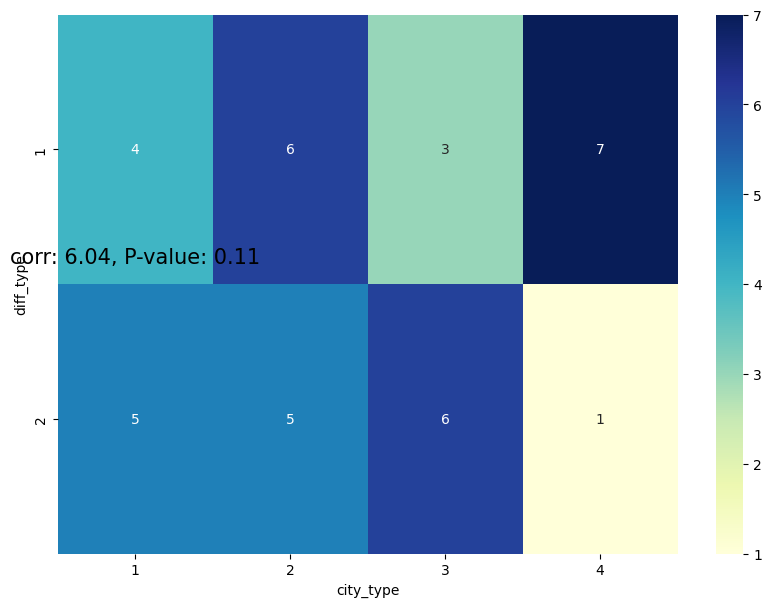

In [26]:
heatmap_plot(contingency_table, 'city_type', 'diff_type', None, (chi2, p_value))


In [41]:
from sentence_transformers import SentenceTransformer, util
from langchain.embeddings import HuggingFaceEmbeddings
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
model_path = 'D:\\OneDrive\\Code Warehouse\\Pretrained models\\text2vec-base-cn'
# model_path = 'D:\\OneDrive\\Code Warehouse\\Pretrained models\\text2vec-large-cn'
model_path = 'D:\\OneDrive\\Code Warehouse\\Pretrained models\\bert chinese'


In [43]:
model_kwargs = {'device': 'cuda'}
model = SentenceTransformer(model_path, model_kwargs)

No sentence-transformers model found with name D:\OneDrive\Code Warehouse\Pretrained models\bert chinese. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at D:\OneDrive\Code Warehouse\Pretrained models\bert chinese were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSe

In [44]:
model_name = model_path
# model_name = "GanymedeNil/text2vec-large-chinese"
# model_name = "nghuyong/ernie-3.0-xbase-zh"

# model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}

hf = HuggingFaceEmbeddings(
   model_name=model_name,
   model_kwargs=model_kwargs,
   encode_kwargs=encode_kwargs
)

No sentence-transformers model found with name D:\OneDrive\Code Warehouse\Pretrained models\bert chinese. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at D:\OneDrive\Code Warehouse\Pretrained models\bert chinese were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSe

In [53]:
test_sen = '智慧工厂现状与市场'

match_sen = ['机器人与先进制造', '智能建造与建筑机器人', '智慧电网', '智慧城市']


In [54]:
model_vec = model.encode(test_sen)
model_embeddings = model.encode(match_sen, convert_to_tensor=False)

model_cosine_scores = util.cos_sim(model_vec, model_embeddings)
model_cosine_scores

tensor([[0.8429, 0.8211, 0.6935, 0.7278]])

In [13]:
model_vec.shape

(768,)

In [12]:
model_embeddings.shape

(3, 768)

In [24]:
tt = model_cosine_scores.detach().numpy().reshape(-1)
tt.shape

(3,)

In [25]:
list(tt)

[0.81961536, 0.6535387, 0.6459776]

In [30]:
hf_vec = np.array(hf.embed_query(test_sen))
hf_embeddings = [np.array(hf.embed_query(txt)) for txt in match_sen]

hf_cosine_scores = util.cos_sim(hf_vec, hf_embeddings)
hf_cosine_scores

tensor([[0.8196, 0.6535, 0.6460]], dtype=torch.float64)

In [31]:
hf_cosine_scores = [ cosine_similarity(hf_vec.reshape(1, -1), embed.reshape(1, -1))[0][0] for embed in hf_embeddings] 
hf_cosine_scores

[0.8196152772988592, 0.6535386538824306, 0.6459775947359473]